In [1]:
# See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')

states = pd.read_csv("states_all.csv")


In [3]:
# Interpret the data by making univariate analysis and indicate the points you consider important.


Text(0.5, 1.0, 'TOTAL_EXPENDITURE')

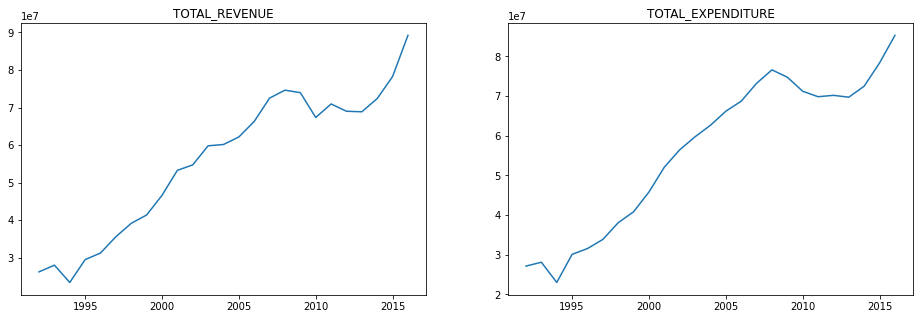

In [40]:
# Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?
cal=states[states["STATE"].isin(["CALIFORNIA"])]
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(cal.YEAR,cal.TOTAL_REVENUE)
plt.title('TOTAL_REVENUE')
plt.subplot(1, 2, 2)
plt.plot(cal.YEAR,cal.TOTAL_EXPENDITURE)
plt.title('TOTAL_EXPENDITURE')

### 2009 global krizinde bir miktar azalmış, onun haricinde yıllara göre artan eğilimide

In [77]:
# In which course are students more successful in your chosen state? Mathematics or reading?
cal=states[states["STATE"].isin(["CALIFORNIA"])]
print("Math Avg ",cal.AVG_MATH_8_SCORE.mean(),"Reading Avg", cal.AVG_READING_8_SCORE.mean())


Math Avg  269.1666666666667 Reading Avg 255.0


### Matematikte daha başarılılar

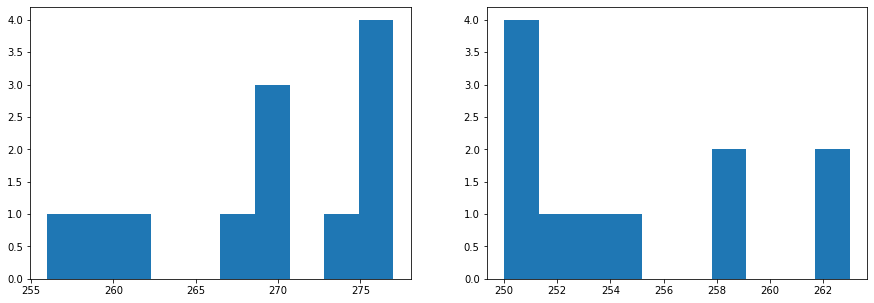

In [83]:
# What is the distribution of mathematics and reading grades?
cal=states[states["STATE"].isin(["CALIFORNIA"])]
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(cal.AVG_MATH_8_SCORE)
plt.subplot(122)
plt.hist(cal.AVG_READING_8_SCORE)
plt.show()

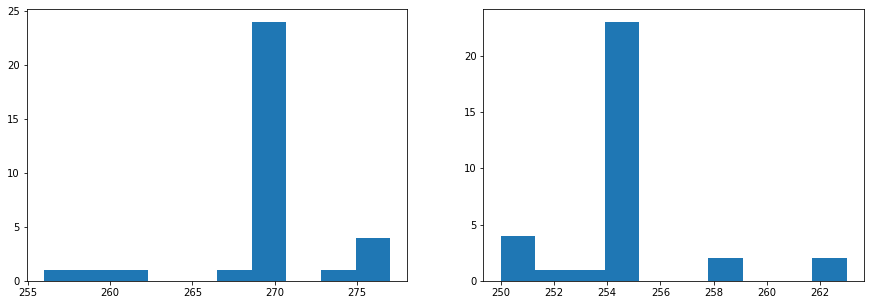

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,...,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000
mean,2002.030,5945343.042,55799199.280,5788586.000,30969284.280,19041329.000,56247851.320,27882975.880,16237200.960,2907486.875,...,446638.688,429496.781,377818.938,3783631.400,1883045.286,5843986.875,227.909,269.167,208.231,255.000
std,9.723,437584.728,16506785.201,2290500.494,8849617.755,5735606.179,16741991.696,7586972.940,4899801.645,650949.862,...,45088.666,60341.807,94619.610,64023.169,107423.473,639401.677,5.009,4.084,3.438,2.739
min,1986.000,4120498.000,23440845.000,2072470.000,13175550.000,7641041.000,23012688.000,12443864.000,6754346.000,1608514.000,...,325902.000,304787.000,243023.000,3591033.000,1578929.000,4377989.000,208.000,256.000,197.000,250.000
25%,1994.000,5945343.042,46628207.000,4024940.000,26877920.000,15725347.000,45829753.000,23514388.000,12429070.000,2570224.000,...,426919.000,388561.000,285132.000,3763810.000,1883045.286,5407475.000,227.909,269.167,208.231,255.000
50%,2002.000,5945343.042,55799199.280,5788586.000,30969284.280,19041329.000,56247851.320,27882975.880,16237200.960,2907486.875,...,463904.000,461133.000,377818.938,3783631.400,1883045.286,6226737.000,227.909,269.167,208.231,255.000
75%,2010.000,6224685.000,68868516.000,7415061.000,36413273.000,23210398.000,69847705.000,34213049.000,20393761.000,3467540.000,...,475192.000,473553.000,478503.000,3783631.400,1952314.000,6312161.000,227.909,269.167,208.231,255.000
max,2019.000,6307022.000,89217262.000,9990221.000,50904567.000,30603616.000,85320133.000,42587272.000,26058021.000,3995951.000,...,493415.000,500143.000,498403.000,3929869.000,2013687.000,6441557.000,235.000,277.000,216.000,263.000


In [84]:
# You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.
cal=states[states["STATE"].isin(["CALIFORNIA"])]
cal=cal.fillna(cal.mean())
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(cal.AVG_MATH_8_SCORE)
plt.subplot(122)
plt.hist(cal.AVG_READING_8_SCORE)
plt.show()
cal.describe()


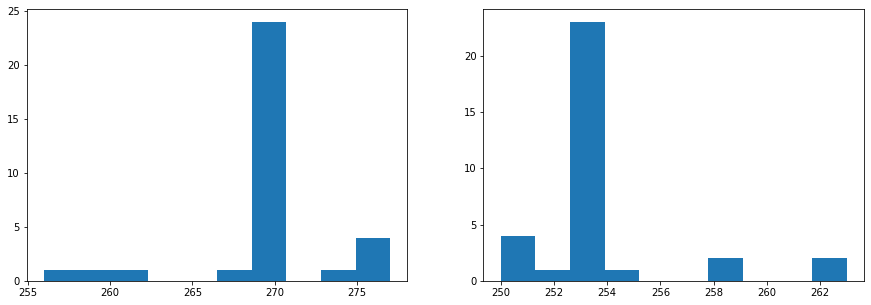

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,...,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000
mean,2002.030,6016399.530,56856926.970,5993551.333,31611340.455,19371293.848,57799391.121,28305277.000,16504273.939,2957327.409,...,447191.606,430518.924,377750.000,3777872.636,1905188.455,5855903.379,230.636,269.697,208.697,253.667
std,9.723,453172.386,16615638.007,2319866.125,8924361.588,5766112.273,16972097.932,7624754.503,4923202.383,656175.997,...,45200.404,60626.820,94620.439,64432.765,111466.034,643055.679,5.378,4.104,3.459,2.901
min,1986.000,4120498.000,23440845.000,2072470.000,13175550.000,7641041.000,23012688.000,12443864.000,6754346.000,1608514.000,...,325902.000,304787.000,243023.000,3591033.000,1578929.000,4377989.000,208.000,256.000,197.000,250.000
25%,1994.000,6045030.000,46628207.000,4024940.000,26877920.000,15725347.000,45829753.000,23514388.000,12429070.000,2570224.000,...,426919.000,388561.000,285132.000,3763810.000,1939323.000,5407475.000,232.000,270.000,209.000,253.000
50%,2002.000,6205883.500,60162326.000,6634068.000,33617766.000,20402434.000,62647953.000,29624968.000,17338877.000,3090235.500,...,464885.000,463227.500,375544.000,3769013.000,1943939.000,6237231.500,232.000,270.000,209.000,253.000
75%,2010.000,6224685.000,68868516.000,7415061.000,36413273.000,23210398.000,69847705.000,34213049.000,20393761.000,3467540.000,...,475192.000,473553.000,478503.000,3771067.000,1952314.000,6312161.000,232.000,270.000,209.000,253.000
max,2019.000,6307022.000,89217262.000,9990221.000,50904567.000,30603616.000,85320133.000,42587272.000,26058021.000,3995951.000,...,493415.000,500143.000,498403.000,3929869.000,2013687.000,6441557.000,235.000,277.000,216.000,263.000


In [85]:
cal=states[states["STATE"].isin(["CALIFORNIA"])]
cal=cal.fillna(cal.median())
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(cal.AVG_MATH_8_SCORE)
plt.subplot(122)
plt.hist(cal.AVG_READING_8_SCORE)
plt.show()
cal.describe()

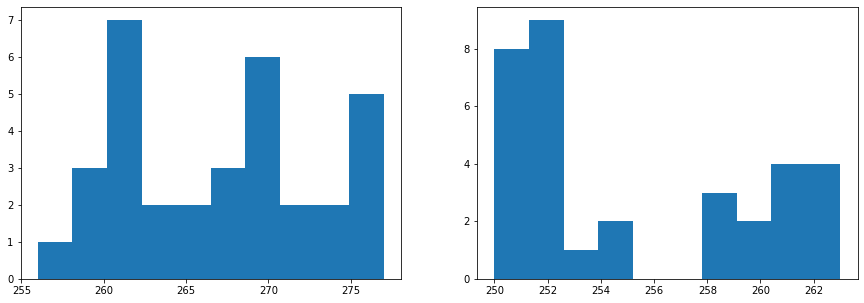

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,...,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000
mean,2002.030,5986493.000,63900547.818,6254160.061,35802080.091,21844307.667,63295677.182,31447653.727,18618005.818,3131994.152,...,447245.394,430870.455,381194.758,3745588.152,1849464.273,5857934.727,225.273,266.773,208.318,255.242
std,9.723,478511.294,21999610.071,2438223.312,12392893.971,7629979.519,20984984.675,9925332.228,6501908.851,848925.622,...,45223.168,60855.600,96586.458,93469.063,159961.230,644402.366,9.783,6.094,5.655,4.652
min,1986.000,4120498.000,23440845.000,2072470.000,13175550.000,7641041.000,23012688.000,12443864.000,6754346.000,1608514.000,...,325902.000,304787.000,243023.000,3591033.000,1578929.000,4377989.000,208.000,256.000,197.000,250.000
25%,1994.000,5941946.000,46628207.000,4024940.000,26877920.000,15725347.000,45829753.000,23514388.000,12429070.000,2362407.000,...,426919.000,388561.000,285132.000,3734997.000,1707952.000,5407475.000,213.000,260.750,204.000,251.500
50%,2002.000,6217031.000,68868516.000,7415061.000,36413273.000,23210398.000,69847705.000,34213049.000,20393761.000,3467540.000,...,465866.000,465322.000,385181.000,3747077.000,1941009.000,6247726.000,231.000,267.000,209.500,252.000
75%,2010.000,6224685.000,89217262.000,7709079.000,50904567.000,30603616.000,85320133.000,42587272.000,26058021.000,3995951.000,...,475192.000,474828.000,484169.000,3771067.000,1952314.000,6312161.000,232.000,271.500,213.250,260.000
max,2019.000,6307022.000,89217262.000,9990221.000,50904567.000,30603616.000,85320133.000,42587272.000,26058021.000,3995951.000,...,493415.000,500143.000,498403.000,3929869.000,2013687.000,6441557.000,235.000,277.000,216.000,263.000


In [86]:
cal=states[states["STATE"].isin(["CALIFORNIA"])]
cal.interpolate(limit_direction="both", inplace=True)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(cal.AVG_MATH_8_SCORE)
plt.subplot(122)
plt.hist(cal.AVG_READING_8_SCORE)
plt.show()
cal.describe()